# PCLab#1 - Group 1 
### Petter, Oskar, Johannes

In [183]:
# Import dependencies
import pandas as pd # type: ignore
import numpy as np # type: ignore
import plotly.express as px # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import plotly.figure_factory as ff # type: ignore
import pandas_datareader.data as web # type: ignore
from scipy.optimize import minimize # type: ignore
import yfinance as yf # type: ignore


# Task 1: Import the data and describe the sample
- Sort the stock data by date and print the number of stocks
- Check if data contains any null values
- What is the average market value of the S&P500 ?
- Which stock or index has the minimum dispersion in dollar value ?
- What is the maximum price for Amazon stock over the specified time period ?

#### Sort the stock data by date and print the number of stocks
**Answer:** There are 8 stocks

In [184]:
# Import the data
data = pd.read_csv('data\Data_PCLab1_Stock.csv', index_col=0)

# Sort the stock data by date
data.sort_index()

# print the number of stocks
## There are 9 colums in total when disregarding the indexed Date column, but one of them is the S&P500
## Because S&P500 is an Index, not a stock, we need to subtract one from the length of columns to find the number of stocks.
n_stocks = len(data.columns) - 1
print("Number of stocks:", n_stocks)

Number of stocks: 8


In [185]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7+ KB


In [186]:
# Set 'Date' to datetime
df.index = pd.to_datetime(df.index)

#### Check if data contains any null values
**Answer:** No

In [187]:
# Check if data contains any null values
df.isnull().values.any()
# Returns "False", meaning there are no null values

False

#### What is the average market value of the S&P500 ?
**Answer:** 2218.75

In [188]:
# What is the average market value of the S&P500 ?
avg_sp500_mval = df['sp500'].mean()
print(avg_sp500_mval)

2218.7495540592868


#### Which stock or index has the minimum dispersion in dollar value ?
**Answer:** By using variance as a measure for dispersion, AT&T (ticker 'T') have the smallest dollar value variance with a variance of 10.28 

In [189]:
# Which stock or index has the minimum dispersion in dollar value ?
## Using variance as a measure of dispersion
variance = df.var(ddof=0) # Using ddof=0 to not normalize the variance
print(f"Ticker {variance.idxmin()} have the smallest dollar value variance with a variance of {variance.min()}")

Ticker T have the smallest dollar value variance with a variance of 10.28322598742513


#### What is the maximum price for Amazon stock over the specified time period ?
**Answer:** 3225.00

In [190]:
# What is the maximum price for Amazon stock over the specified time period ?
df['AMZN'].max() # 3225 is the maximum price of Amazon stock over the specified time period


3225.0

# Taks 2: Plot the data
Define a function to plot the entire dataframe
- The function takes in a dataframe as an input argument and does not return anything back

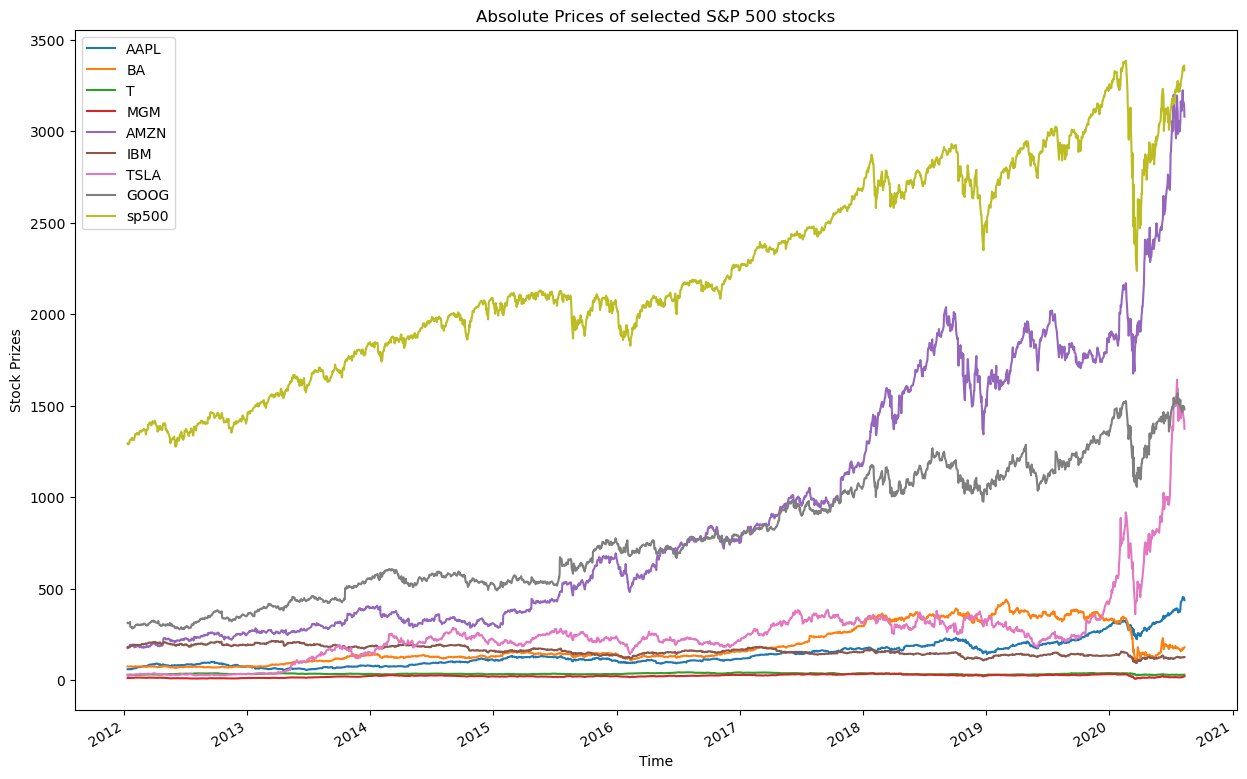

In [191]:
def plot_function(df, title='Untitled Chart'):
    fig = df.plot(figsize = (15,10) , xlabel= 'Time', ylabel = 'Stock Prizes', title = title )
    fig.plot()
    return
    
plot_function(df, title = 'Absolute Prices of selected S&P 500 stocks')

# Task 3: Print out normalized (scaled) stock prices
Define a function to normalize the prices based on the initial price
- The function simply divides every stock by it’s price at the start date (i.e. : Date = 2012-01-12)

Plot normalized data

Optional : Define a function to perform an interactive data plotting using plotly express

#### Normalize the prices and plot

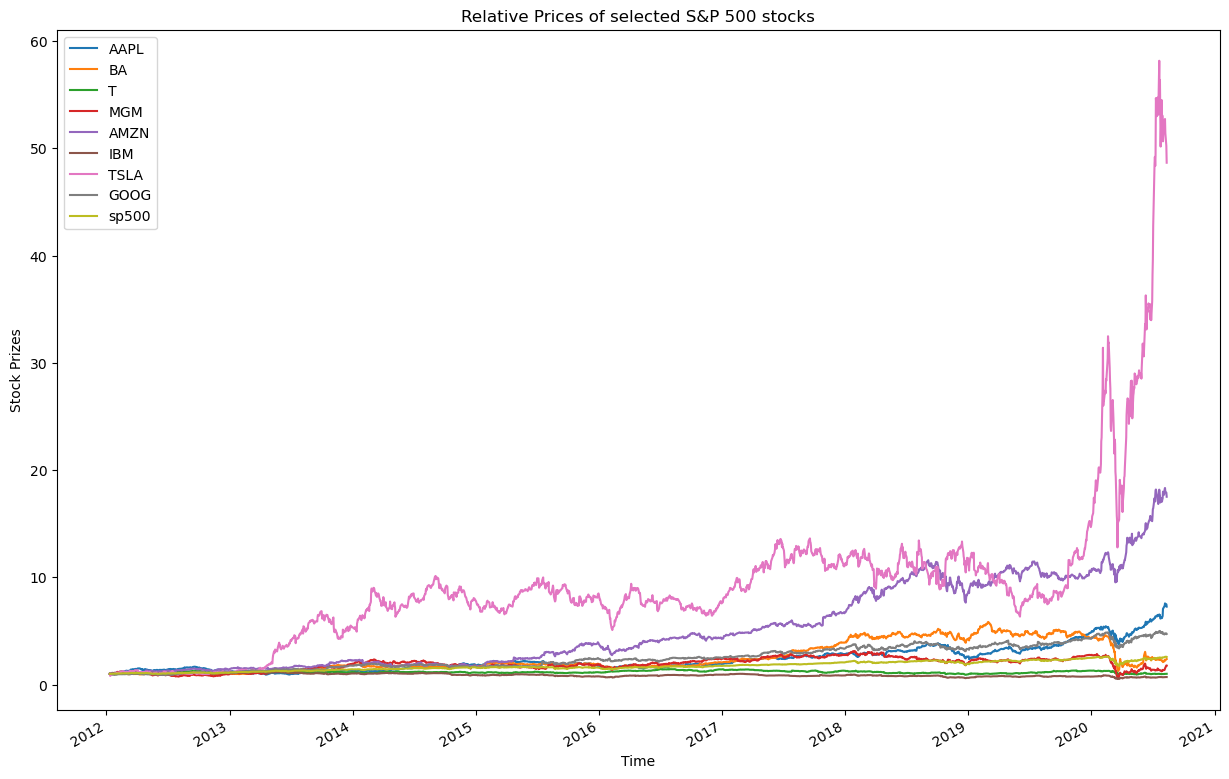

In [192]:
# Create a normalized dataframe by taking all the values and divide them on the first index of the original df (because it is sorted alphabetically)
def normalize_prices(df):
    df_norm = df / df.iloc[0]
    return df_norm

df_norm = normalize_prices(df)

plot_function(df_norm, title = 'Relative Prices of selected S&P 500 stocks')

#### Optional: Define a function to perform an interactive data plotting using plotly express


In [193]:
def plot_ex(df, title, log_y=False):
    fig = px.line(df, line_shape='spline', title=title,
                  log_y=log_y, range_x=(df.index.min(), df.index.max())
                  )
    fig.show()
    return

plot_ex(df_norm, title = 'Interactive Chart of Relative Prices (in Log Scale) of selected S&P 500 stocks', log_y=True)

# Task 5: Calculate stock returns (1)
Define a function to calculate stocks daily returns (for all stocks)
- Loop through each stock
- Loop through each row belonging to the stock

Plot it !


In [194]:
def calculate_daily_returns(df):
    # Create a new df as a copy
    df_daily_returns = df.copy()
    
    #  first Loop through each stock 
    for stock in df.columns:
        # Initialize the first value as NA (no past values)
        df_daily_returns[stock].iloc[0] = pd.NA
        
        # Loop through each day's price, starting from second date
        for i in range(1, len(df)):
            # Calculate the daily return: (current day's price - previous day's price) / previous day's price
            previous_price = df[stock].iloc[i-1]
            current_price = df[stock].iloc[i]
            daily_return = (current_price - previous_price) / previous_price
            
            # Replace asset price with return
            df_daily_returns[stock].iloc[i] = daily_return
    
    return df_daily_returns

df_daily_returns = calculate_daily_returns(df).dropna()
# plot_function(daily_returns)
df_daily_returns

AAPL        BA         T       MGM      AMZN       IBM  \
Date                                                                     
2012-01-13 -0.003749 -0.012051 -0.001660  0.018137  0.014153 -0.007699   
2012-01-17  0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689   
2012-01-18  0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944   
2012-01-19 -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038   
2012-01-20 -0.017417 -0.000529  0.002959 -0.012500 -0.018102  0.044316   
...              ...       ...       ...       ...       ...       ...   
2020-08-05  0.003625  0.055794 -0.005332  0.000000  0.021091 -0.003099   
2020-08-06  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341   
2020-08-07 -0.024495 -0.012660  0.006032  0.030878 -0.017842 -0.009198   
2020-08-10  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206   
2020-08-11 -0.029740  0.004013  0.000000 -0.006928 -0.021438 -0.002832   

                TSLA      GOOG     sp500  
Date                                      
2012-01-13 -0.193274 -0.007385 -0.004948  
2012-01-17  0.167179  0.005744  0.003553  
2012-01-18  0.007895  0.006889  0.011108  
2012-01-19 -0.001865  0.010523  0.004939  
2012-01-20 -0.005979 -0.083775  0.000669  
...              ...       ...       ...  
2020-08-05 -0.001332  0.005898  0.006430  
2020-08-06  0.003071  0.017976  0.006428  
2020-08-07 -0.024752 -0.003740  0.000633  
2020-08-10 -0.023501  0.001077  0.002742  
2020-08-11 -0.031144 -0.010547 -0.007969  

[2158 rows x 9 columns]

#### Plot it!

In [195]:
plot_ex(df_daily_returns, title='Daily Return of selected Stocks in S&P 500')

# Task 5: Calculate stock returns (2)
- Calculate the correlations between daily returns
- Plot the correlation table as in heat-map
- What are the top 2 stocks that are positively correlated with the S&P500 ?
- What is the correlation between Amazon and Boeing ? Comment on your answer
- What is the correlation between MGM and Boeing ? Comment on your answer

#### Calculate the correlations between daily returns

In [196]:
df_correlations = df_daily_returns.corr()
df_correlations

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
AAPL   1.000000  0.385249  0.341373  0.384088  0.410233  0.434534  0.288534   
BA     0.385249  1.000000  0.401602  0.554229  0.267466  0.479264  0.250946   
T      0.341373  0.401602  1.000000  0.340166  0.233145  0.484219  0.152515   
MGM    0.384088  0.554229  0.340166  1.000000  0.309016  0.441631  0.311879   
AMZN   0.410233  0.267466  0.233145  0.309016  1.000000  0.339589  0.310083   
IBM    0.434534  0.479264  0.484219  0.441631  0.339589  1.000000  0.245610   
TSLA   0.288534  0.250946  0.152515  0.311879  0.310083  0.245610  1.000000   
GOOG   0.509124  0.388048  0.353695  0.439141  0.575283  0.458816  0.322804   
sp500  0.657320  0.641826  0.617463  0.631449  0.539560  0.703935  0.387920   

           GOOG     sp500  
AAPL   0.509124  0.657320  
BA     0.388048  0.641826  
T      0.353695  0.617463  
MGM    0.439141  0.631449  
AMZN   0.575283  0.539560  
IBM    0.458816  0.703935  
TSLA   0.322804  0.387920  
GOOG   1.000000  0.684571  
sp500  0.684571  1.000000

#### Plot the correlation table as a heat-map

<Axes: >

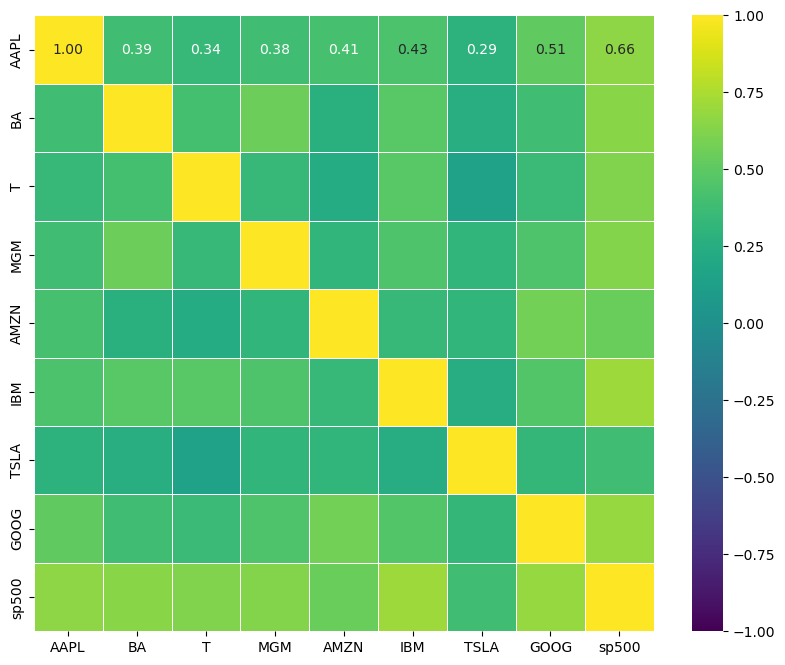

In [197]:
plt.figure(figsize=(10,8))
sns.heatmap(df_correlations, cmap = 'viridis', vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=.5)

#### What are the top 2 stocks that are positively correlated with the S&P500 ?
**Answer:** The S&P500 have highest correlation is with IBM and Google.

In [198]:
df_correlations['sp500'].sort_values(ascending=False)[1:3] # Excluting the S&P500 (index 0) as its correlation with itself is 1.

IBM     0.703935
GOOG    0.684571
Name: sp500, dtype: float64

#### What is the correlation between Amazon and Boeing ? Comment on your answer
**Answer:** The correlation of 0.27 is to be interprented as there being some linear dependence between the two stocks, but there is likely no causal effect - Just the market sentiment and undiversiable risks that affect the market in general.

While lacking comparables, the correlation intuively is neither suspcially high nor low, which seem plausible as the two companies operate in different sectors, but are a part of the same market - The S&P500.

In [199]:
df_correlations['AMZN']['BA'] # = 0.2674655118977553

0.26746551189775514

#### What is the correlation between MGM and Boeing ? Comment on your answer.
**Answer:** The correlation of .55 is quite high, and showcase that MGM and Boeing's returns are quite closely knit together. The reason for this is likely that they are somewhat in a similar sector.

MGM operates resorts and entertainment (films and casinos) - thus they are heavily dependent on tourism.
Boeing builds airplanes and ~44% of their revenue stems from selling airplanes to commercial customers (https://www.investopedia.com/articles/markets/032715/how-boeing-makes-its-money.asp).

Therefore, Boeing is also heavily dependent on the tourism/travel sector as most of its revenue stems from firms directly involved
in the segment.

Because both firms are heavily dependent on the market development in the same market, it is reasonable that they correlate
at a higher frequency than with other firms, such as Amazon.


In [200]:
df_correlations['MGM']['BA'] # = 0.554229313584076

0.5542293135840756

# Task 5 : Calculate stock returns (3)
- Plot the histograms of daily returns and comment
- Optional: Define a function to perform an interactive and fancy histograms plots using Plotly
    - Plotly’s Python API contains a super powerful module known as figure factory module

#### Plot the histograms of daily returns and comment
**Answer:** Most observations are close to 0.00 and certainly within +/- 10% - even for the most volatile stocks as Telsa and MGM.
Interstingly, there is not a significant difference in the number of days with positive versus negative returns for individual stocks, nor the S&P500. However, the S&P500 is less volatile and have more positive days than all individual stocks in this analysis.

This shows the effect of diversification.

<Axes: ylabel='Frequency'>

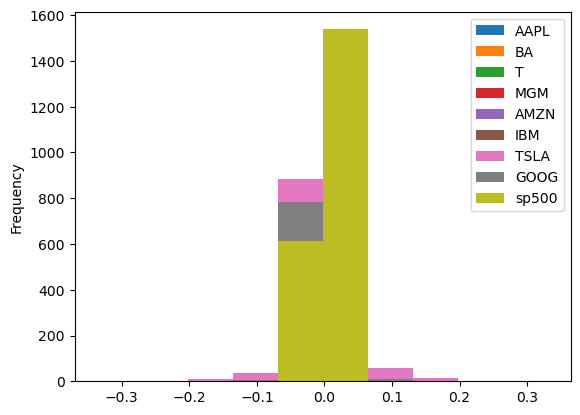

In [201]:
df_daily_returns.plot.hist()

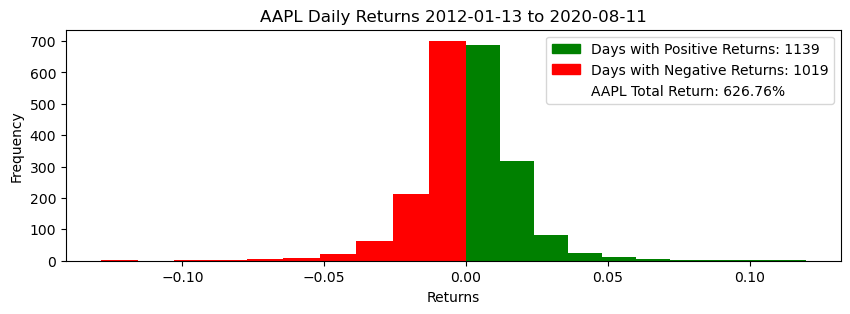

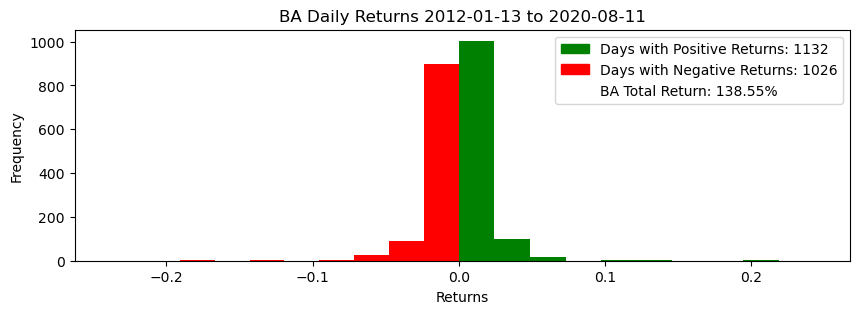

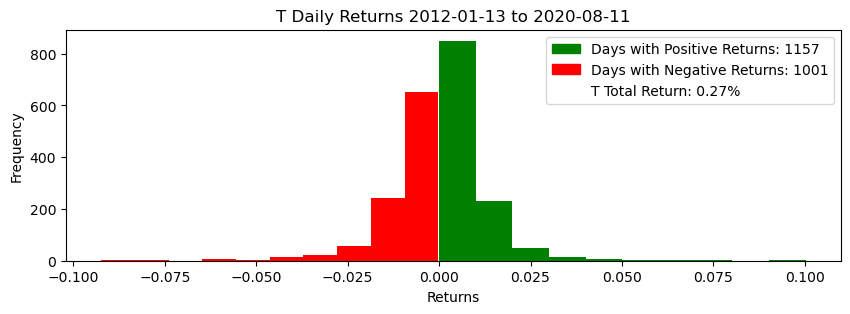

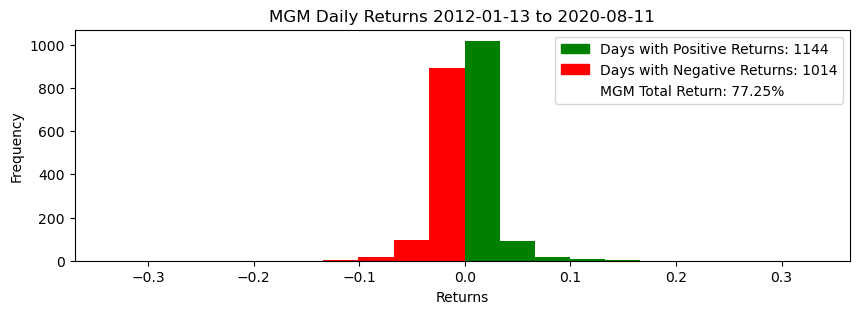

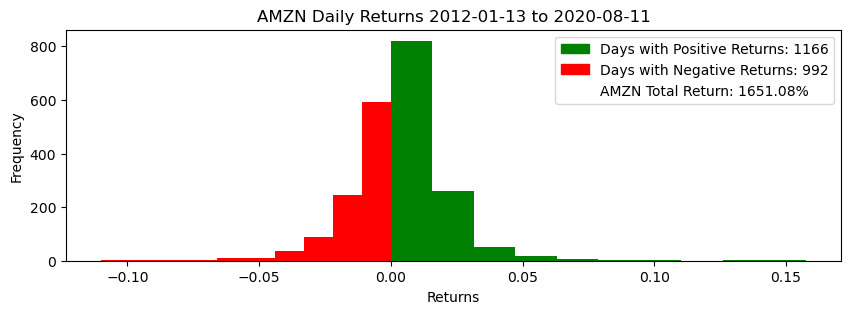

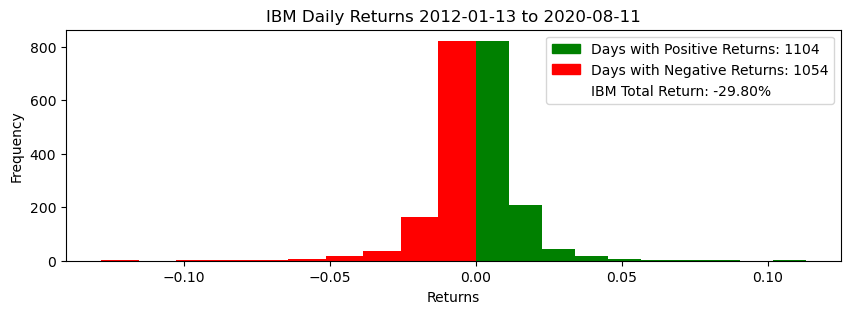

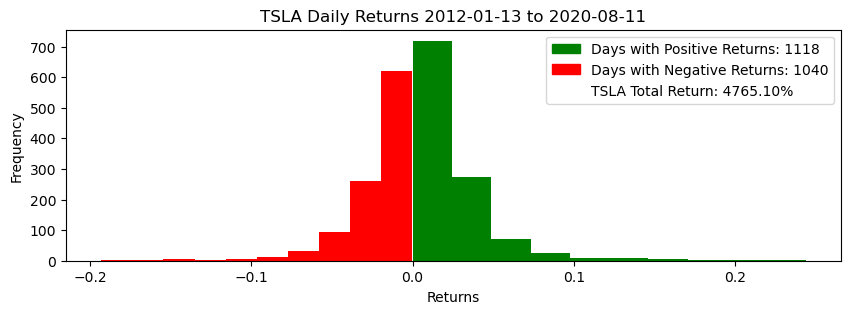

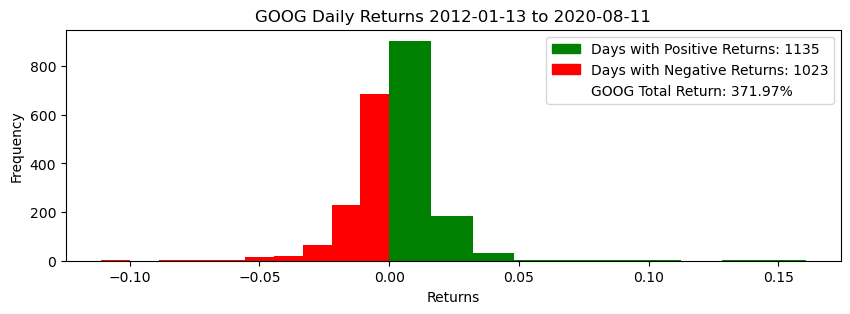

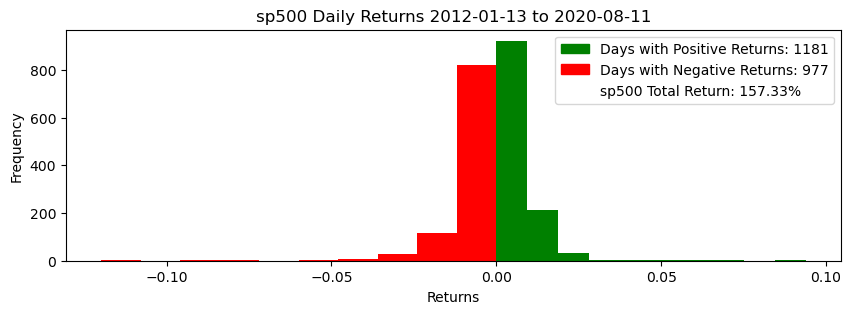

In [202]:
for column in df_daily_returns.columns:
    positive_returns = df_daily_returns[df_daily_returns[column] >= 0][column]
    negative_returns = df_daily_returns[df_daily_returns[column] < 0][column]
    total_return = (1 + df_daily_returns[column]).cumprod().iloc[-1] - 1
    
    plt.figure(figsize=(10,3)) 
    
    # Plot for positive returns
    plt.hist(positive_returns, color='green', label='Positive Returns')
    
    # Plot for negative returns
    plt.hist(negative_returns, color='red', label='Negative Returns')

    # Make pretty
    plt.title(column + ' Daily Returns 2012-01-13 to 2020-08-11')
    plt.xlabel('Returns') 
    plt.ylabel('Frequency')
    
    # Create handles and labels for legend
    handles = [plt.Rectangle((0,0),1,1,color='green'),
               plt.Rectangle((0,0),1,1,color='red'),
               plt.Rectangle((0,0),1,1,fc='white',ec='white',label=column)]
    
    labels = [f'Days with Positive Returns: {len(positive_returns)}',
              f'Days with Negative Returns: {len(negative_returns)}',
              column + ' Total Return: {:.2f}%'.format(total_return*100)]
    
    plt.legend(handles, labels)
    plt.show()

#### Optional: Define a function to perform an interactive and fancy histograms plots using Plotly
- Plotly’s Python API contains a super powerful module known as figure factory
module


In [203]:
def plot_fancy_histogram(df, bin_size=1, title=''):
    fig = px.histogram(df, x=df_daily_returns.columns)
    fig.update_layout(title=title, xaxis_title='Returns', yaxis_title='Frequency')
    fig.show()

plot_fancy_histogram(df_daily_returns, title=f'Daily Returns {df_daily_returns.index.min()} to {df_daily_returns.index.max()}')

In [204]:
def plot_fancy_histogram(df, bin_size=1, title=''):
    # Convert the df to a list of lists - necessary to use figure factory.
    hist_data = [df[column].tolist() for column in df.columns]
    
    fig = ff.create_distplot(hist_data, df.columns.tolist(), bin_size=bin_size, show_hist=False)
    fig.update_layout(title=title, xaxis_title='Returns', yaxis_title='Density')
    fig.show()
    
plot_fancy_histogram(df_daily_returns, title=f'Histogram of Daily Returns from {df_daily_returns.index.min()} to {df_daily_returns.index.max()}')

# Task 6: Portfolio weights
- Write a function that will:
    - Simulate 1000 portfolios with random weights
    - Compute the return, the variance and the Sharpe ratio of each portfolio
    - Return the maximum Sharpe ratio and its weights
- What are the weights of your tangency portfolio ? What would have been the performance of this portfolio over the sample period ? Plot it !


#### Write a function that:
- Simulate 1000 portfolios with random weights
- Compute the return, the variance and the Sharpe ratio of each portfolio
- Return the maximum Sharp ratio and its weights

Before simulating, we will find the correct risk-free return in the time-period by using data collected from Darthmouth regarding French-Fama 5-factor model, which include monthly risk-free rates.

In [205]:
# First, we find the risk free rate for the period from Dartmouth, as it is supplemented in their French-Fama dataset
# We get the data from https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html
def get_total_risk_free_rate_of_return(df):
    ff = web.DataReader('f-f_Research_Data_5_Factors_2x3',  # noqa: F811
                'famafrench',
                start='2010')[0]

    ff.index = ff.index.to_timestamp()

    ff = ff.resample('M').last().div(100) # divide by 100 to get correct format
    ff.index.name = 'date'

    rf = ff['RF'] # We only want the 'RF' column and the period for which we have asset data
    mask = (ff.index >= df.index.min()) & (ff.index < df.index.max())
    rf = rf.loc[mask]
    total_rf_return = (1 + rf).prod() - 1 # calculate the effective risk-free rate in the period
    
    return total_rf_return

total_rf_return = get_total_risk_free_rate_of_return(df)
total_rf_return

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



0.055549175890983404

In [206]:
def calc_total_return(df):
    return (df.loc[df.index.max()] / df.loc[df.index.min()]) - 1

# Compute portfolio performance (return, volatility)
def portfolio_performance(weights, total_return, cov_matrix, n_days):
    portfolio_return = np.dot(weights.flatten(), total_return)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))*n_days)
    
    # annualized_portfolio_return = 
    # annualized_portfolio_volatility = 
    return portfolio_return, portfolio_volatility

# Simulate portfolios, calculate mean_returns, cov_matrix, and risk-free rate within the function
def simulate_portfolios(stock_data, num_portfolios=1000):
    """
    Simulate portfolios with random weights, calculate return, volatility, and Sharpe ratio.
    Returns the results and the maximum Sharpe ratio portfolio.
    
    Parameters:
    - stock_data: DataFrame containing stock prices with dates as index
    - num_portfolios: Number of portfolios to simulate (default: 1000)
    """
    # Calculate daily returns of the stocks
    df_daily_returns = stock_data.pct_change().dropna() # a lot faster than the function defined earlier.
    
    # Calculate mean returns and covariance matrix
    total_return = stock_data.apply(calc_total_return)
    cov_matrix = df_daily_returns.cov()
    # Get risk-free rate for the period based on stock data's index range
    risk_free_rate = get_total_risk_free_rate_of_return(stock_data)
    # print(f"Total Risk-Free Rate of Return in period: {risk_free_rate:.6f}")
        
    df_portfolios = pd.DataFrame(columns=['portfolio', 'sharpe_ratio', 'return', 'volatility', 'weights']).set_index('portfolio')

    for i in range(num_portfolios):
        weights_dict = {}
        
        # Generate random weights and normalize them
        weights = np.random.rand(1,9).T # Transpose to get correct format for matrix-vector dot-product
        weights /= np.sum(weights)
        
        # append weights to the dict
        for idx, stock in enumerate(stock_data.columns):
            weights_dict[stock] = weights[idx][0]

        # Portfolio return and volatility
        portfolio_return, portfolio_volatility = portfolio_performance(weights, total_return, cov_matrix, len(stock_data))
        
        # Sharpe ratio calculation with risk-free rate
        ## THIS NEEDS TO BE CONVERTED TO ANNUALY DATA
        portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / (portfolio_volatility)
        
        # Store the results
        df_portfolios.loc[i] = [portfolio_sharpe_ratio, portfolio_return, portfolio_volatility, weights_dict]

    return df_portfolios, cov_matrix, risk_free_rate

#### What are the weights of your tangency portfolio ?
**Answer:** The tangency portfolio is the portfolio with the highest Sharpe ratio. Based on the simulation, the portfolio with the highest Sharpe ratio have the following weights:


In [207]:
df_portfolios, cov_matrix, risk_free_rate = simulate_portfolios(df)

best_portfolio = df_portfolios.sort_values(by=['sharpe_ratio'], ascending=False).iloc[0]

for key, value in best_portfolio['weights'].items():
    print(f"{key}: {value*100:.4f}%")

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



AAPL: 8.2593%
BA: 2.4480%
T: 10.0418%
MGM: 1.2106%
AMZN: 32.5197%
IBM: 2.6131%
TSLA: 31.4431%
GOOG: 7.2284%
sp500: 4.2360%


#### What would have been the performance of this portfolio over the sample period ?
**Answer:** Return of the best portfolio:

In [208]:
print(f'Return of the best portfolio: {best_portfolio["return"]*100:.2f}%')

Return of the best portfolio: 2124.11%


#### Plot it !

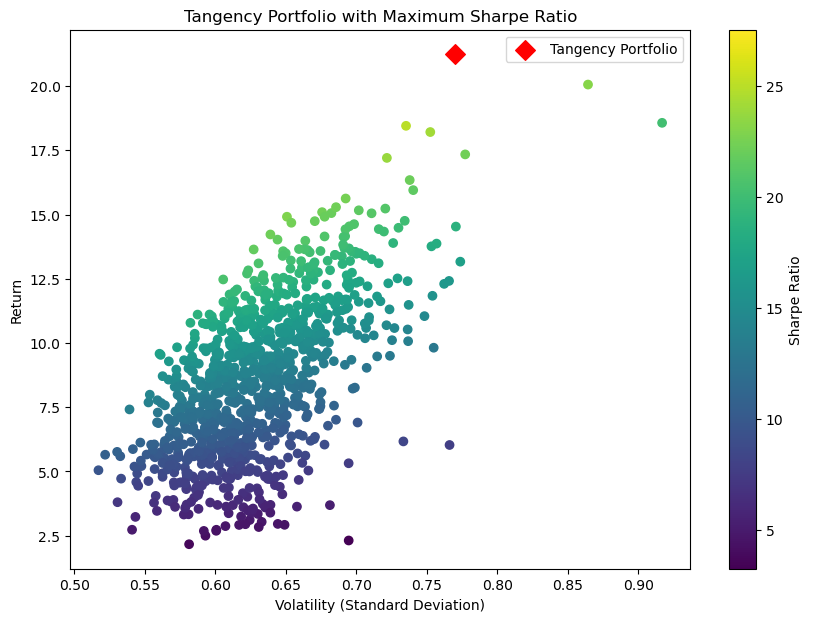

In [209]:
def plot_tangency_portfolio(df_portfolios):
    # Find the index of the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = df_portfolios['sharpe_ratio'].idxmax()
    
    # Get returns, volatility, and Sharpe ratios for plotting
    returns = df_portfolios['return']
    volatility = df_portfolios['volatility']
    sharpe_ratios = df_portfolios['sharpe_ratio']
    
    # Plot the results
    plt.figure(figsize=(10, 7))
    
    # Scatter plot of portfolios
    plt.scatter(volatility, returns, c=sharpe_ratios, cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')

    # Highlight the maximum Sharpe ratio portfolio (tangency portfolio)
    plt.scatter(volatility[max_sharpe_idx], returns[max_sharpe_idx], c='red', marker='D', s=100, label='Tangency Portfolio')

    # Adding titles and labels
    plt.title('Tangency Portfolio with Maximum Sharpe Ratio')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Example usage:
plot_tangency_portfolio(df_portfolios)


#### Optional : Define a function that finds the weights that minimize the variance for all possible level or return (i.e., that draw the efficient frontier).

In [212]:
def portfolio_variance(weights, cov_matrix):
    return (weights.T @ cov_matrix @ weights)*252*8

def expected_return_constraint(weights, expected_ret, target_ret):
    return weights.T @ expected_ret - target_ret

def sum_weights_constraint(weights):
    return np.sum(weights) - 1

def find_efficient_frontier(expected_returns, cov_matrix, target_returns):
    num_assets = len(expected_returns)
    results = []
    for ret in returns_range:
        constraints = (
            {'type': 'eq', 'fun': expected_return_constraint, 'args': (expected_returns, ret)},
            {'type': 'eq', 'fun': sum_weights_constraint}
        )
        bounds = tuple((0, 1) for _ in range(num_assets))
        initial_guess = np.array([1./num_assets] * num_assets)
        result = minimize(portfolio_variance, initial_guess, args=(cov_matrix,),
                          method='SLSQP', bounds=bounds, constraints=constraints)
        results.append({'return': ret, 'std': np.sqrt(result.fun), 'weights': result.x})
    return results

target_returns = np.linspace(df_portfolios['return'].min(), df_portfolios['return'].max(), 200)  # Range of desired returns
efficient_frontier = find_efficient_frontier(calc_total_return(df), cov_matrix, target_returns)

#### Plot it against the previous scatter plot

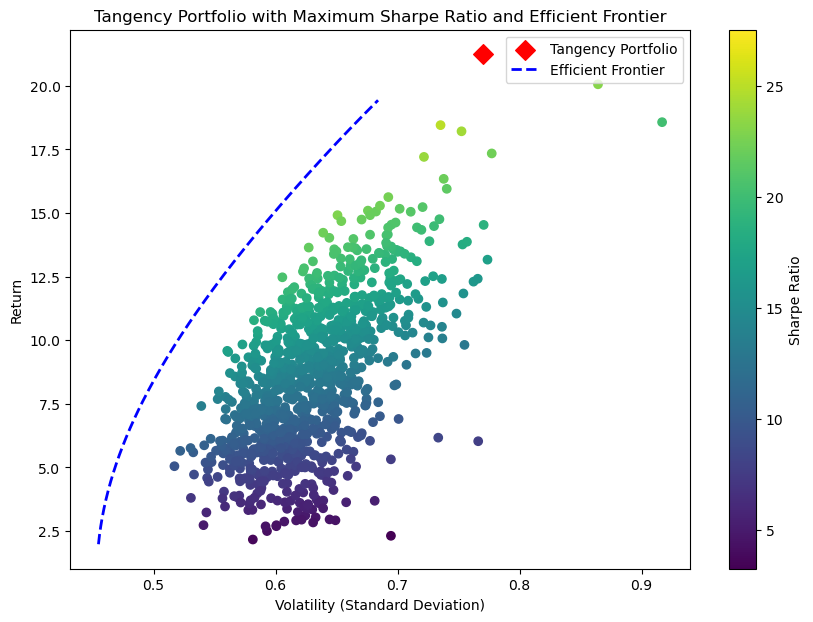

In [213]:
def plot_tangency_portfolio_with_frontier(df_portfolios, efficient_frontier):
    # Find the index of the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = df_portfolios['sharpe_ratio'].idxmax()

    # Get returns, volatility, and Sharpe ratios for plotting
    returns = df_portfolios['return']
    volatility = df_portfolios['volatility']
    sharpe_ratios = df_portfolios['sharpe_ratio']

    # Plot the results
    plt.figure(figsize=(10, 7))
    
    # Scatter plot of simulated portfolios
    plt.scatter(volatility, returns, c=sharpe_ratios, cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')

    # Highlight the maximum Sharpe ratio portfolio (tangency portfolio)
    plt.scatter(volatility[max_sharpe_idx], returns[max_sharpe_idx], c='red', marker='D', s=100, label='Tangency Portfolio')

    # Plot the efficient frontier (volatility vs return)
    frontier_volatility = [i['std'] for i in efficient_frontier]
    frontier_return = [i['return'] for i in efficient_frontier]
    plt.plot(frontier_volatility, frontier_return, color='blue', linestyle='--', linewidth=2, label='Efficient Frontier')

    # Adding titles and labels
    plt.title('Tangency Portfolio with Maximum Sharpe Ratio and Efficient Frontier')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Example usage:
plot_tangency_portfolio_with_frontier(df_portfolios, efficient_frontier)

# Task 7: Testing Portfolio Theory - Optional
Re-run Task #6 but only on the first part of the sample (2012-2016)
- Find out what are the optimal weights for this period
- Simulate your optimal portfolio on the second part of the sample (2016-end)
    - How does it perform ?
    - Plot the expected (measured over the 1st period) vs. the realized return and volatility (over the second).

Super optional: Let’s go a step further. Every year, you re-balance your portfolio
based on last year data. What is your performance overall ?

In [214]:
def run_task_7a(stock_data):
    """
    Task 7a: Optimized portfolio based on 2012-2016 data, and evaluate its performance on 2016-end period.
    
    - Find optimized portfolio based on 2012-2016 period
    - Compare its performance on 2016-end period to an equal-weight portfolio.
    """
    # Split data into two periods
    stock_data_train = stock_data.loc['2012':'2016']
    stock_data_test = stock_data.loc['2016':]

    # Simulate for the first period (2012-2016)
    df_portfolios, cov_matrix, risk_free_rate = simulate_portfolios(stock_data_train)
    best_portfolio_idx = df_portfolios['sharpe_ratio'].idxmax()
    best_portfolio_weights = np.array([df_portfolios['weights'][best_portfolio_idx][stock] for stock in stock_data_train.columns])
    
    # Calculate total returns and covariance matrix for the training period
    total_returns_train = stock_data_train.apply(calc_total_return)
    cov_matrix_train = stock_data_train.pct_change().dropna().cov()
    
    # Expected performance of the optimized portfolio in the training period
    expected_return_opt, expected_volatility_opt = portfolio_performance(best_portfolio_weights, total_returns_train, cov_matrix_train, len(stock_data_train))
    
    # Calculate total returns and covariance matrix for the test period (2016-end)
    total_returns_test = stock_data_test.apply(calc_total_return)
    cov_matrix_test = stock_data_test.pct_change().dropna().cov()
    
    # True performance of the optimized portfolio in the test period
    true_return_opt, true_volatility_opt = portfolio_performance(best_portfolio_weights, total_returns_test, cov_matrix_test, len(stock_data_test))

    # Equal-weight portfolio
    equal_weights = np.ones(len(stock_data_train.columns)) / len(stock_data_train.columns)
    
    # Expected performance of equal-weight portfolio based on 2012-2016
    expected_return_eq, expected_volatility_eq = portfolio_performance(equal_weights, total_returns_train, cov_matrix_train, len(stock_data_train))
    
    # True performance of equal-weight portfolio in second period (2016-end)
    true_return_eq, true_volatility_eq = portfolio_performance(equal_weights, total_returns_test, cov_matrix_test, len(stock_data_test))
    
    # Output results
    print("--- Optimized Portfolio (2012-2016) ---")
    print(f"Expected Return (2016-End): {expected_return_opt:.4f}")
    print(f"Expected Volatility (2016-End): {expected_volatility_opt:.4f}")
    print(f"True Return (2016-End): {true_return_opt:.4f}")
    print(f"True Volatility (2016-End): {true_volatility_opt:.4f}")
    
    print("\n--- Equal Weights Portfolio ---")
    print(f"Expected Return (2016-End): {expected_return_eq:.4f}")
    print(f"Expected Volatility (2016-End): {expected_volatility_eq:.4f}")
    print(f"True Return (2016-End): {true_return_eq:.4f}")
    print(f"True Volatility (2016-End): {true_volatility_eq:.4f}")
    
    # Plot comparison of expected vs. realized returns for both portfolios
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(['Optimized Expected', 'Optimized Realized', 'Equal Weight Expected', 'Equal Weight Realized'],
           [expected_return_opt, true_return_opt, expected_return_eq, true_return_eq], color=['blue', 'blue', 'green', 'green'])
    ax.set_ylabel('Return')
    ax.set_title('Expected vs Realized Returns (Optimized vs Equal Weight)')
    plt.show()


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



--- Optimized Portfolio (2012-2016) ---
Expected Return (2016-End): 2.8457
Expected Volatility (2016-End): 0.4560
True Return (2016-End): 2.3914
True Volatility (2016-End): 0.5809

--- Equal Weights Portfolio ---
Expected Return (2016-End): 1.7455
Expected Volatility (2016-End): 0.3629
True Return (2016-End): 1.5392
True Volatility (2016-End): 0.5200


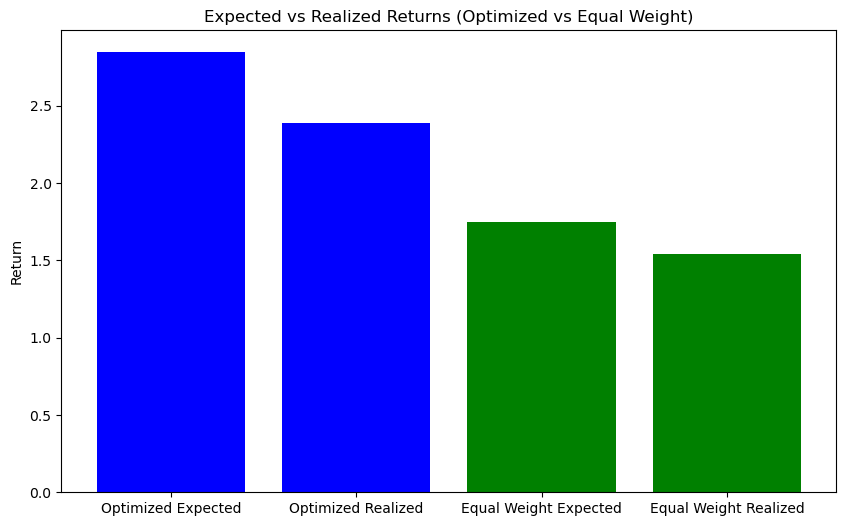

In [215]:
run_task_7a(df)

#### Super optional: Let’s go a step further. Every year, you re-balance your portfolio based on last year data.

#### What is your performance overall ?

In [216]:
def rebalance_yearly(stock_data):
    """
    Task 7b: Rebalance portfolio yearly based on last year's data.
    
    - Optimized portfolio based on the previous year's performance
    - Compare its performance with an equal-weight portfolio for each year
    """
    years = stock_data.index.year.unique()
    yearly_results = []
    
    for year in years[1:]:  
        stock_data_year = stock_data.loc[str(year-1)]
        stock_data_next_year = stock_data.loc[str(year)]
        
        # Simulate for the current year to get the optimal portfolio based on that year
        df_portfolios, cov_matrix, risk_free_rate = simulate_portfolios(stock_data_year)
        
        # Find the index of the portfolio with the maximum Sharpe ratio
        best_portfolio_idx = df_portfolios['sharpe_ratio'].idxmax()
        best_portfolio_weights = np.array([df_portfolios['weights'][best_portfolio_idx][stock] for stock in stock_data_year.columns])
        
        # Calculate total returns and covariance matrix for the current year
        total_returns_year = stock_data_year.apply(calc_total_return)
        cov_matrix_year = stock_data_year.pct_change().dropna().cov()
        
        # Expected performance of optimized portfolio in the next year
        expected_return_opt, expected_volatility_opt = portfolio_performance(best_portfolio_weights, total_returns_year, cov_matrix_year, len(stock_data_year))
        
        # Calculate total returns and covariance matrix for the next year
        total_returns_next_year = stock_data_next_year.apply(calc_total_return)
        cov_matrix_next_year = stock_data_next_year.pct_change().dropna().cov()

        # True performance of optimized portfolio in the next year
        true_return_opt, true_volatility_opt = portfolio_performance(best_portfolio_weights, total_returns_next_year, cov_matrix_next_year, len(stock_data_next_year))
        
        # Equal-weight portfolio
        equal_weights = np.ones(len(stock_data_year.columns)) / len(stock_data_year.columns)
        
        # Expected performance of equal-weight portfolio based on current year
        expected_return_eq, expected_volatility_eq = portfolio_performance(equal_weights, total_returns_year, cov_matrix_year, len(stock_data_year))
        
        # True performance of equal-weight portfolio in the next year
        true_return_eq, true_volatility_eq = portfolio_performance(equal_weights, total_returns_next_year, cov_matrix_next_year, len(stock_data_next_year))

        # Store the results for comparison
        yearly_results.append({
            'Year': year ,
            'Expected Return Opt': expected_return_opt,
            'Expected Volatility Opt': expected_volatility_opt,
            'True Return Opt': true_return_opt,
            'True Volatility Opt': true_volatility_opt,
            'Expected Return Eq': expected_return_eq,
            'Expected Volatility Eq': expected_volatility_eq,
            'True Return Eq': true_return_eq,
            'True Volatility Eq': true_volatility_eq
        })

        # Output for each year
        print(f"\n--- Year {year } ---")
        print(f"Expected Return Optimized Portfolio: {expected_return_opt:.4f}")
        print(f"Expected Volatility Optimized Portfolio: {expected_volatility_opt:.4f}")
        print(f"Expected Sharpe Ratio Optimized Portfolio: {(expected_return_opt - 0.03) / expected_volatility_opt:.4f}")
        print(f"\nTrue Return Optimized Portfolio: {true_return_opt:.4f}")
        print(f"True Volatility Optimized Portfolio: {true_volatility_opt:.4f}")
        print(f"True Sharpe Ratio Optimized Portfolio: {(true_volatility_opt - 0.03) / true_volatility_opt:.4f}")
        
        print(f"\nExpected Return Equal Weight Portfolio: {expected_return_eq:.4f}")
        print(f"Expected Volatility Equal Weight Portfolio: {expected_volatility_eq:.4f}")
        print(f"\nTrue Return Equal Weight Portfolio: {true_return_eq:.4f}")
        print(f"True Volatility Equal Weight Portfolio: {true_volatility_eq:.4f}")

    # Plot comparison of expected vs realized returns and volatilities
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    
    years_range = [year for year in years[1:]]
    
    # Return comparison
    ax[0].plot(years_range, [result['Expected Return Opt'] for result in yearly_results], label='Optimized Expected', marker='o')
    ax[0].plot(years_range, [result['True Return Opt'] for result in yearly_results], label='Optimized Realized', marker='x')
    ax[0].plot(years_range, [result['Expected Return Eq'] for result in yearly_results], label='Equal Weight Expected', marker='o')
    ax[0].plot(years_range, [result['True Return Eq'] for result in yearly_results], label='Equal Weight Realized', marker='x')
    ax[0].set_ylabel('Return')
    ax[0].set_title('Expected vs Realized Returns (Optimized vs Equal Weight)')
    ax[0].legend()
    
    # Volatility comparison
    ax[1].plot(years_range, [result['Expected Volatility Opt'] for result in yearly_results], label='Optimized Expected', marker='o')
    ax[1].plot(years_range, [result['True Volatility Opt'] for result in yearly_results], label='Optimized Realized', marker='x')
    ax[1].plot(years_range, [result['Expected Volatility Eq'] for result in yearly_results], label='Equal Weight Expected', marker='o')
    ax[1].plot(years_range, [result['True Volatility Eq'] for result in yearly_results], label='Equal Weight Realized', marker='x')
    ax[1].set_ylabel('Volatility')
    ax[1].set_title('Expected vs Realized Volatility (Optimized vs Equal Weight)')
    ax[1].legend()
    
    plt.show()


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2013 ---
Expected Return Optimized Portfolio: 0.2133
Expected Volatility Optimized Portfolio: 0.1595
Expected Sharpe Ratio Optimized Portfolio: 1.1494

True Return Optimized Portfolio: 0.3015
True Volatility Optimized Portfolio: 0.1280
True Sharpe Ratio Optimized Portfolio: 0.7657

Expected Return Equal Weight Portfolio: 0.1389
Expected Volatility Equal Weight Portfolio: 0.1639

True Return Equal Weight Portfolio: 0.6986
True Volatility Equal Weight Portfolio: 0.1418


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2014 ---
Expected Return Optimized Portfolio: 1.0570
Expected Volatility Optimized Portfolio: 0.1827
Expected Sharpe Ratio Optimized Portfolio: 5.6201

True Return Optimized Portfolio: 0.0575
True Volatility Optimized Portfolio: 0.1870
True Sharpe Ratio Optimized Portfolio: 0.8396

Expected Return Equal Weight Portfolio: 0.6986
Expected Volatility Equal Weight Portfolio: 0.1418

True Return Equal Weight Portfolio: 0.0453
True Volatility Equal Weight Portfolio: 0.1562


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2015 ---
Expected Return Optimized Portfolio: 0.1526
Expected Volatility Optimized Portfolio: 0.1447
Expected Sharpe Ratio Optimized Portfolio: 0.8474

True Return Optimized Portfolio: 0.0436
True Volatility Optimized Portfolio: 0.1793
True Sharpe Ratio Optimized Portfolio: 0.8327

Expected Return Equal Weight Portfolio: 0.0453
Expected Volatility Equal Weight Portfolio: 0.1562

True Return Equal Weight Portfolio: 0.1944
True Volatility Equal Weight Portfolio: 0.1867


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2016 ---
Expected Return Optimized Portfolio: 0.4919
Expected Volatility Optimized Portfolio: 0.2148
Expected Sharpe Ratio Optimized Portfolio: 2.1508

True Return Optimized Portfolio: 0.1572
True Volatility Optimized Portfolio: 0.1844
True Sharpe Ratio Optimized Portfolio: 0.8373

Expected Return Equal Weight Portfolio: 0.1944
Expected Volatility Equal Weight Portfolio: 0.1867

True Return Equal Weight Portfolio: 0.1387
True Volatility Equal Weight Portfolio: 0.1558


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2017 ---
Expected Return Optimized Portfolio: 0.2046
Expected Volatility Optimized Portfolio: 0.1337
Expected Sharpe Ratio Optimized Portfolio: 1.3058

True Return Optimized Portfolio: 0.0952
True Volatility Optimized Portfolio: 0.0946
True Sharpe Ratio Optimized Portfolio: 0.6830

Expected Return Equal Weight Portfolio: 0.1387
Expected Volatility Equal Weight Portfolio: 0.1558

True Return Equal Weight Portfolio: 0.3102
True Volatility Equal Weight Portfolio: 0.1024


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2018 ---
Expected Return Optimized Portfolio: 0.6023
Expected Volatility Optimized Portfolio: 0.1259
Expected Sharpe Ratio Optimized Portfolio: 4.5470

True Return Optimized Portfolio: -0.0017
True Volatility Optimized Portfolio: 0.2567
True Sharpe Ratio Optimized Portfolio: 0.8831

Expected Return Equal Weight Portfolio: 0.3102
Expected Volatility Equal Weight Portfolio: 0.1024

True Return Equal Weight Portfolio: -0.0658
True Volatility Equal Weight Portfolio: 0.2242


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2019 ---
Expected Return Optimized Portfolio: 0.0728
Expected Volatility Optimized Portfolio: 0.2600
Expected Sharpe Ratio Optimized Portfolio: 0.1646

True Return Optimized Portfolio: 0.2007
True Volatility Optimized Portfolio: 0.1731
True Sharpe Ratio Optimized Portfolio: 0.8267

Expected Return Equal Weight Portfolio: -0.0658
Expected Volatility Equal Weight Portfolio: 0.2242

True Return Equal Weight Portfolio: 0.3097
True Volatility Equal Weight Portfolio: 0.1652


C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_27340\3814499334.py:4: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.




--- Year 2020 ---
Expected Return Optimized Portfolio: 0.4035
Expected Volatility Optimized Portfolio: 0.1510
Expected Sharpe Ratio Optimized Portfolio: 2.4728

True Return Optimized Portfolio: 0.0764
True Volatility Optimized Portfolio: 0.3743
True Sharpe Ratio Optimized Portfolio: 0.9199

Expected Return Equal Weight Portfolio: 0.3097
Expected Volatility Equal Weight Portfolio: 0.1652

True Return Equal Weight Portfolio: 0.2525
True Volatility Equal Weight Portfolio: 0.3997


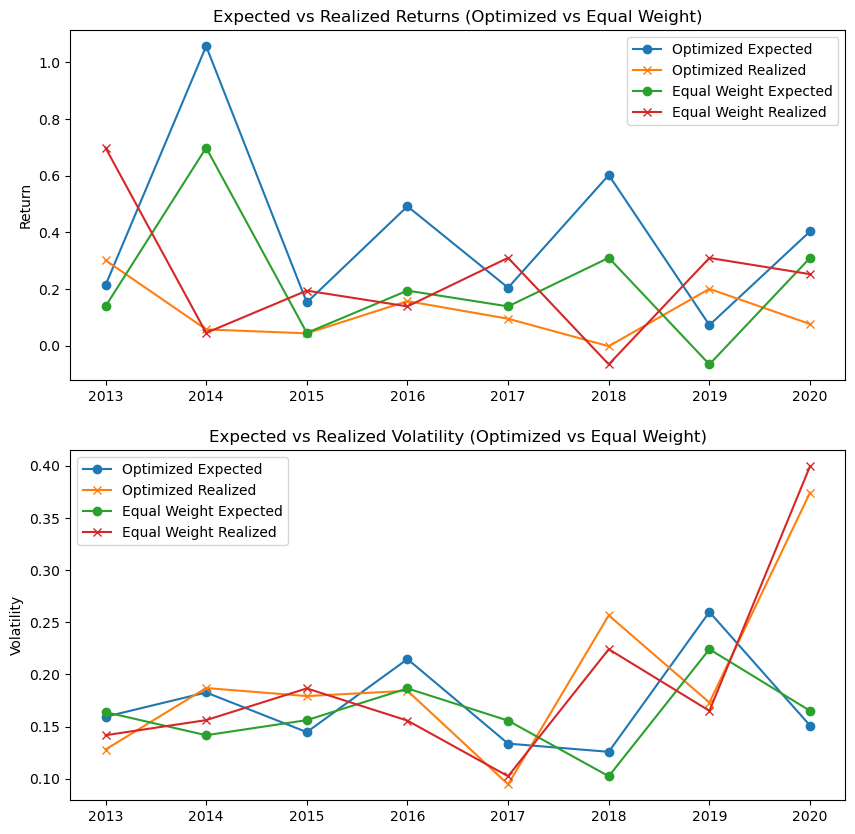

In [217]:
rebalance_yearly(df)